In [1]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns

In [2]:
uploaded = files.upload()

Saving churn_data.csv to churn_data.csv


In [3]:
df = pd.read_csv("churn_data.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5847,9391-YZEJW,Female,0,No,No,62,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),94.00,5757.2,No
710,1029-QFBEN,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,Yes
4993,5360-XGYAZ,Male,0,Yes,Yes,72,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),65.65,4664.5,No
5638,5143-WMWOG,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.95,19.95,Yes
923,9199-PWQVC,Female,0,Yes,No,63,Yes,Yes,DSL,Yes,Yes,No,No,Yes,Yes,One year,Yes,Credit card (automatic),79.70,4786.15,No


In [ ]:
df.shape

(7043, 21)

In [ ]:
# Checking the data types of all the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Data Cleaning Part 1

TotalCharges is an object data type. It should be in numerical data type. Let's convert it to numerical data type

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df.isnull().sum() # Checking no. of null/NaN values in each column of our df


ValueError: ignored

Hmmm... some values seems to be not numbers but blank string. Let's find out such rows

In [ ]:
# Remove rows with space in TotalCharges
df = df[df.TotalCharges!=' ']

In [ ]:
# Converting string to numeric form
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

As we can see there are 11 missing values in TotalCharges column. Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [ ]:
#Removing missing values 
df.dropna(inplace = True)

In [ ]:
#drop column customerID as they are redundant
df.drop(columns= ['customerID'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

For data exploration divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [ ]:
# Group the tenure in bins of 12 months
labels = [f"{i} - {i+11}" for i in range(1, df['tenure'].max(), 12)]

df['tenure_group'] = pd.cut(df.tenure, range(1, df['tenure'].max()+5, 12), right=False, labels=labels)

In [ ]:
df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
49 - 60     832
25 - 36     832
37 - 48     762
Name: tenure_group, dtype: int64

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# Exploratory data analysis

## 1. Exploring data on categorical values of columns

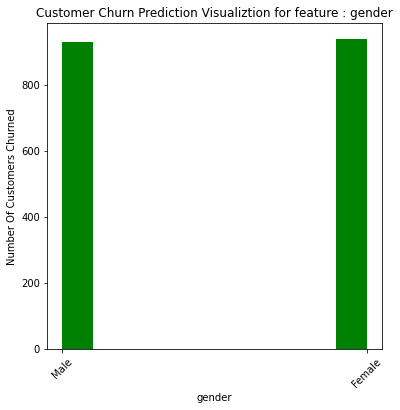

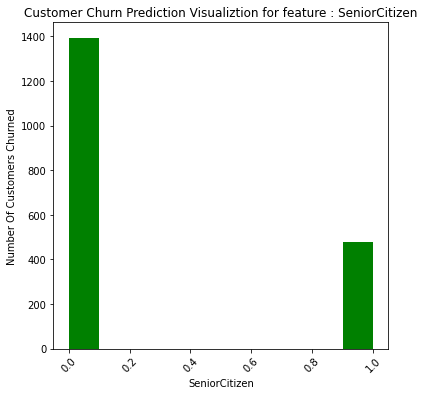

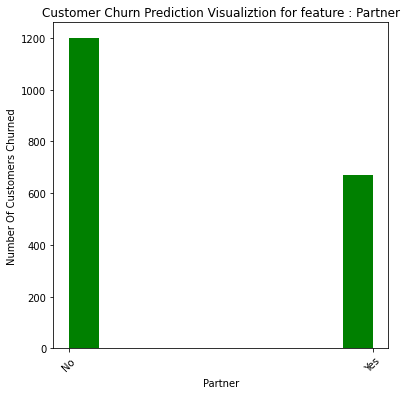

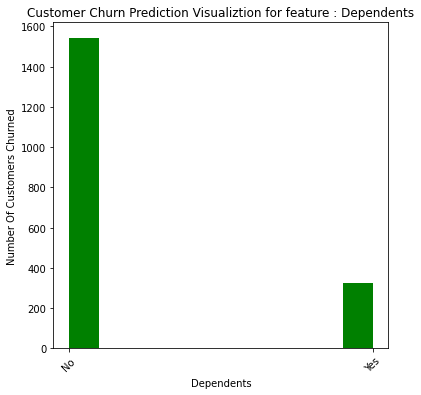

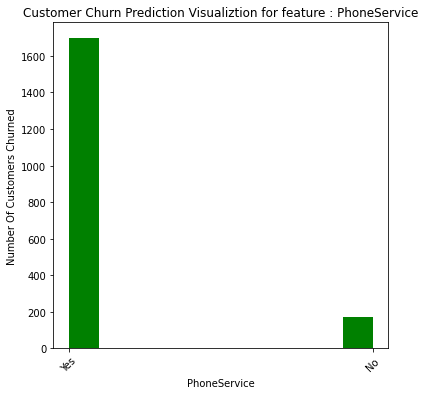

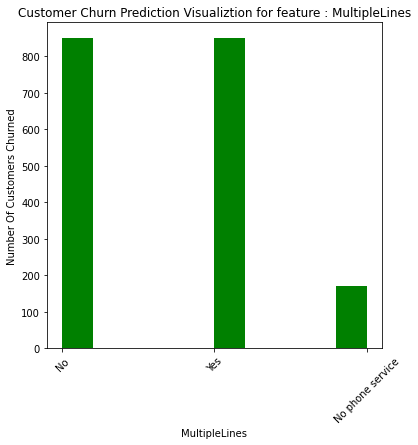

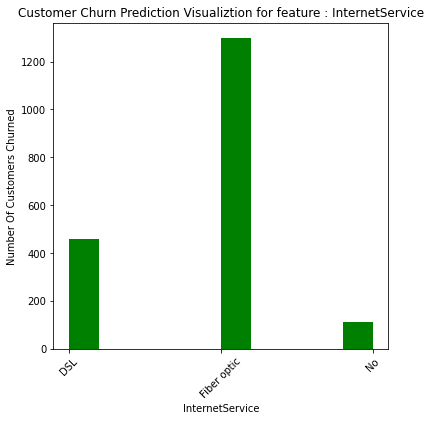

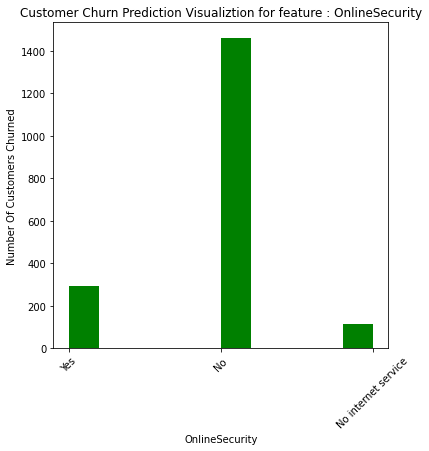

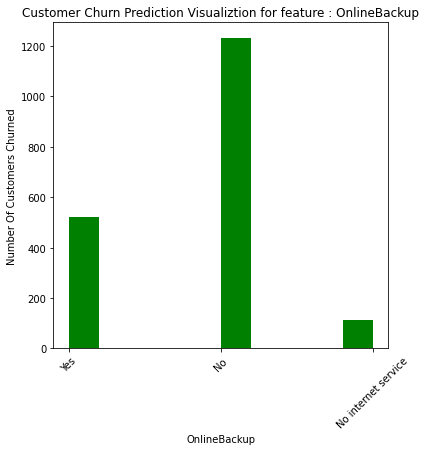

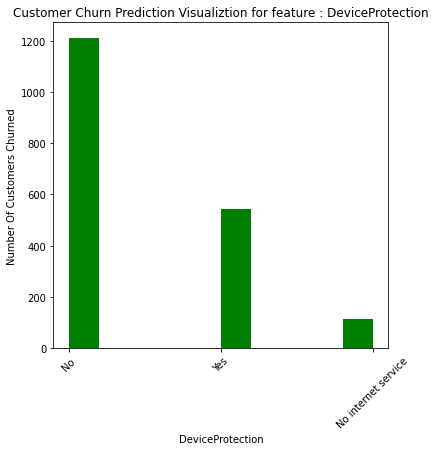

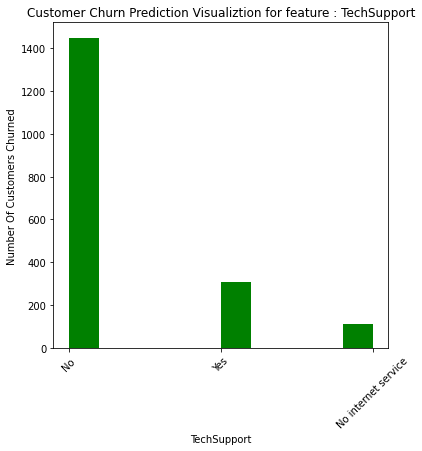

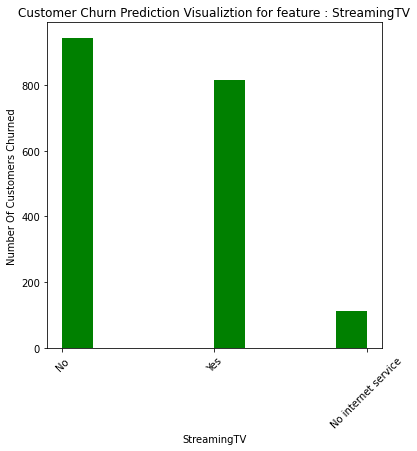

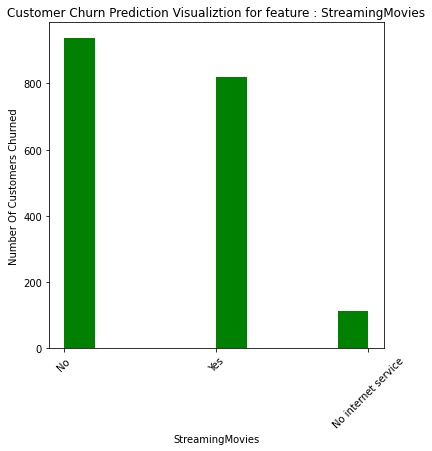

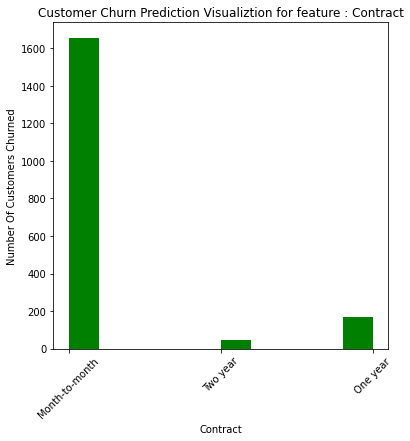

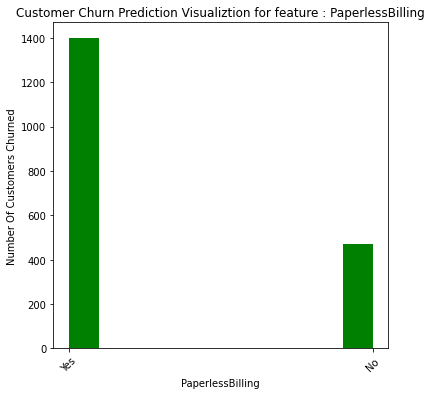

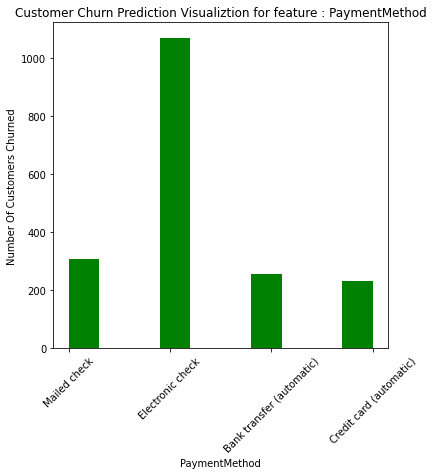

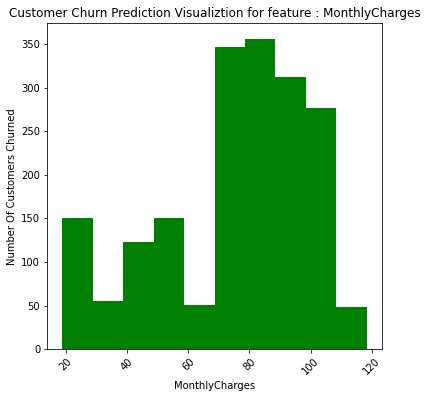

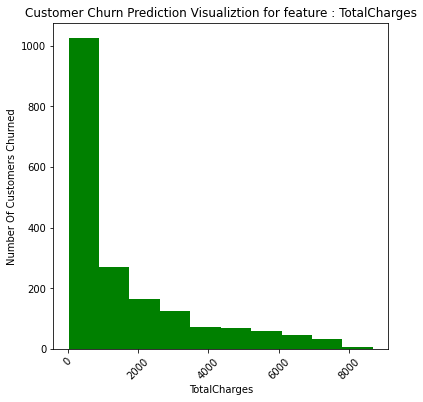

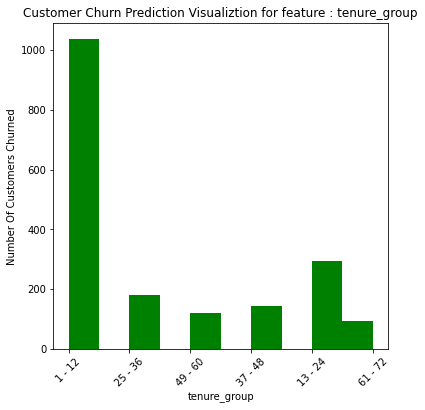

In [ ]:
# Here We will not consider column 'churn' as it is our target column
# Were are not considering 'tenure' column as we have grouped them into bins in new column 'tenure_group'

# Here we will plot the number of customer churning on different sets of features 
for i, predictor in enumerate(df.drop(columns=['Churn', 'tenure'])):
    plt.figure(i, figsize=(6,6))
  
    tenure_churn_yes = df[df.Churn=='Yes'][predictor]

    plt.xlabel(predictor)
    plt.xticks(rotation=45)
    plt.ylabel("Number Of Customers Churned")
    plt.title(f"Customer Churn Prediction Visualiztion for feature : {predictor}")

    plt.hist([tenure_churn_yes], rwidth=5.00, color=['green'])

Few Insights from data exploration : 


1.   The low tenure and high monthly charge bins have higher churn rates, as supported by the previous analysis. At the same time, the low Total charge bin has a higher churn rate. 
2.   The customers have phone services and have a higher rate to churn.
1.   Customers who have fibre optic as an internet service are more likely to churn. This can happen due to high prices, competition, customer service, and many other reasons. Fiber optic service is much more expensive than DSL, which may be one of the reasons why customers churn.
2.   Customers with  OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport are more unlikely to churn. Streaming service is not predictive for churn as it’s evenly distributed to yes and no options.
1.   Gender and partner are evenly distributed with approximate percentage values.
1.   There’s a higher proportion of churn in younger customers (SeniorCitizen = No), customers with no partners, and customers with no dependents.
1.   The demographic section of data highlights on-senior citizens with no partners and dependents as a particular segment of customers likely to churn.
2.   The shorter the contract, the higher the churn rate. Those with more extended plans face additional barriers when canceling early. This clearly explains the motivation for companies to have long-term relationships with their customers
2.   Churn Rate is higher for the customers who opted for paperless billing.
2.   Customers who pay with electronic checks are more likely to churn, and this kind of payment is more common than other payment types.







# Data cleaning Part 2 (Encoding categorical columns to numerical values)

Let's print unique values in object columns to see data values

In [ ]:
for column in df:
    if df[column].dtypes=='object':
        print(f'{column}: {df[column].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [ ]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [ ]:
for column in df:
    if df[column].dtypes=='object':
        print(f'{column}: {df[column].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Convert Yes -> 1, No -> 0                                                                      
Female -> 1, Male -> 0

In [ ]:
yes_no_columns = ['gender','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    try:
        df[col].replace({'Yes': 1,'No': 0, 'Female' : 1, 'Male':0},inplace=True)
    except:
        pass
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1 - 12
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,25 - 36
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1 - 12
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1 - 12


One hot encoding for remaining categorical columns

In [ ]:
df = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,tenure_group,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1 - 12,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,25 - 36,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1 - 12,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,37 - 48,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1 - 12,0,1,0,1,0,0,0,0,1,0


In [ ]:
df.shape

(7032, 28)

In [ ]:
df.dtypes

gender                                        int64
SeniorCitizen                                 int64
Partner                                       int64
Dependents                                    int64
tenure                                        int64
PhoneService                                  int64
MultipleLines                                 int64
OnlineSecurity                                int64
OnlineBackup                                  int64
DeviceProtection                              int64
TechSupport                                   int64
StreamingTV                                   int64
StreamingMovies                               int64
PaperlessBilling                              int64
MonthlyCharges                              float64
TotalCharges                                float64
Churn                                         int64
tenure_group                               category
InternetService_DSL                           uint8
InternetServ

In [ ]:
# Now we dont deen column 'tenure_group'. It was used only for data exploration
df1 = df.drop(['tenure_group'], axis=1)

# Build a corelation of all predictors with 'Churn'

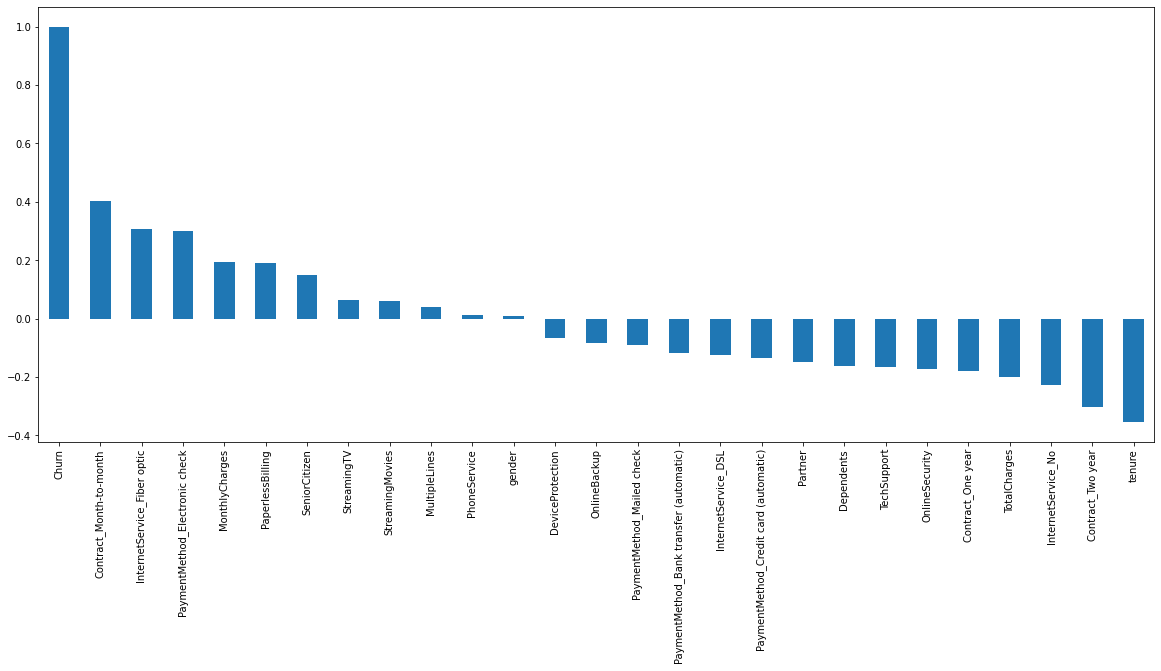

In [ ]:
plt.figure(figsize=(20,8))
df1.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Observation**: Factors like Gender, Availability of PhoneService and number of multiple lines have alomost NO impact on Churn.    
**Reason** : Low Correlation of those features with our target column 'Churn'

In [ ]:
# Thus we remove these irrelevant columns : ['gender', 'PhoneService', 'MultipleLines']
df2 = df1.drop(['gender', 'PhoneService', 'MultipleLines'], axis=1)

In [ ]:
print(df2.columns)

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


# Building and testing various Machine Learning models

In [ ]:
# Import Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# Scaling of our data using sklearn's MinMaxScaler
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [ ]:
# Splitting our data into two sets : training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df2.drop(['Churn'], axis=1), df2['Churn'], test_size=0.2)

In [ ]:
print('Shape of X_train : ', X_train.shape)
print('Shape of X_test : ', X_test.shape)

Shape of X_train :  (5625, 23)
Shape of X_test :  (1407, 23)


## We will be using GridSearchCV to try and test different models with different hyperparameters

In [ ]:
# Instantiating our models with different hyper parameters

model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,5,10,20,25,30,35,40,45,50,55,60,65,70],
            'kernel': ['rbf','linear', 'poly', 'sigmoid']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,20,25,30,35,40,45,50,55,60,65,70]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10,20,25,30,35,40,45,50,55,60,65,70]
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
model_chart = pd.DataFrame(scores,columns=['model','best_score','best_params'])
model_chart

,model,best_score,best_params
0,svm,0.798044,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.789333,{'n_estimators': 35}
2,logistic_regression,0.804089,{'C': 1}


As you can see that the accuracy is quite low, and as it's an imbalanced dataset. We use SMOTE-ENN method to balance the dataset that we are using in classification modeling. It uses "Oversampling of minority class" approach. This is the process of generating synthetic data that tries to randomly generate a sample of the attributes from observations in the minority class. In simple terms, it looks at the feature space for the minority class data points and considers its k nearest neighbours.

In [ ]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(df2.drop(['Churn'], axis=1), df2['Churn'])

In [ ]:
xr_train1, xr_test1, yr_train1, yr_test1 = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(xr_train1, yr_train1)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
model_chart = pd.DataFrame(scores,columns=['model','best_score','best_params'])
model_chart

,model,best_score,best_params
0,svm,0.944714,"{'C': 70, 'kernel': 'rbf'}"
1,random_forest,0.959460,{'n_estimators': 50}
2,logistic_regression,0.919533,{'C': 70}


We see that balancing our data with SMOTEENN has worked pretty well for us. Accuracy has improved dramatically. RandomForestClassifier performs best with optimal parameters : 'n_estimators': 50

In [ ]:
model1 = RandomForestClassifier(n_estimators=50)
model1.fit(xr_train1, yr_train1)

RandomForestClassifier(n_estimators=50)

In [ ]:
# Predicting our model on testing data
yr_predict1 = model1.predict(xr_test1)

In [ ]:
# Getting evaluation metrics of our model
from sklearn.metrics import classification_report
print('Accuracy score of our model : ', model1.score(xr_test1, yr_test1))
print('------------------------------------------------------')
print(classification_report(yr_test1, yr_predict1))

Accuracy score of our model :  0.963963963963964
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       589
           1       0.96      0.97      0.97       632

    accuracy                           0.96      1221
   macro avg       0.96      0.96      0.96      1221
weighted avg       0.96      0.96      0.96      1221



## Let's try reducing dimensions using PCA

In [ ]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(xr_train_pca, yr_train1)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
model_chart = pd.DataFrame(scores,columns=['model','best_score','best_params'])
model_chart

,model,best_score,best_params
0,svm,0.939804,"{'C': 70, 'kernel': 'rbf'}"
1,random_forest,0.956797,{'n_estimators': 20}
2,logistic_regression,0.907862,{'C': 5}


With PCA, we observe that all three models are performing almost similar to the previous approach thus we will keep our features as it is and finalise our model from GridSearchCV i.e RandomForestClassifier

## Building simple Artificial Neural Network (ANN) model and train it on our dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(23, input_shape=(23,), activation='relu'),
    #keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(xr_train1, yr_train1, epochs=500, verbose=False)

In [ ]:
model.evaluate(xr_test1, yr_test1)

39/39 [==============================] - 0s 1ms/step - loss: 0.4287 - accuracy: 0.9492


[0.42866814136505127, 0.9492219686508179]

We observe that our ANN model cannot outperform RandomForestClassifier. We conclude that RandomForestClassifier is best model in our case

# Saving our best model i.e RandomForestClassifier

In [ ]:
#Saving best model 
import joblib
#Sava the model to disk
filename = 'model.sav'
joblib.dump(model1, filename)

['model.sav']

# Model Deployment

It’s essential to deploy your model so that predictions can be made from a trained ML model available to others, whether users, management, or other systems. We’ll use **Streamlit** in this section. It’s an open-source Python library that makes it easy to create and share beautiful, custom web apps for machine learning and data science.

For deployment app we have written a python script -> app.py